# Implement scripts and functions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.linear_model import Lasso, LinearRegression, Ridge

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
%reload_ext autoreload

## Read in file, clean functions and perform rolling means

In [3]:
import preprocessor, league_table, soccer_model
import rolling_means as rmeans
import soccer_linear_model as footy_lin_mod
import Team_Dominancy as team_dom

In [4]:
csvfile = '../data/FootballEurope/FootballEurope.csv' 
roll_df = rmeans.final_df_rolling_means(csvfile)  

In [5]:
roll_df.head()

AerialsTotalFT  CornersTotalFT  \
days_after_opener game_id Team                                        
0 days            232     Reading               NaN             NaN   
                          Stoke                 NaN             NaN   
                  292     QPR                   NaN             NaN   
                          Swansea               NaN             NaN   
                  293     Liverpool             NaN             NaN   

                                     DispossessedFT  DribbleSuccessFT  \
days_after_opener game_id Team                                          
0 days            232     Reading               NaN               NaN   
                          Stoke                 NaN               NaN   
                  292     QPR                   NaN               NaN   
                          Swansea               NaN               NaN   
                  293     Liverpool             NaN               NaN   

                                     DribbledPastFT  DribblesAttemptedFT  \
days_after_opener game_id Team                                             
0 days            232     Reading               NaN                  NaN   
                          Stoke                 NaN                  NaN   
                  292     QPR                   NaN                  NaN   
                          Swansea               NaN                  NaN   
                  293     Liverpool             NaN                  NaN   

                                     DribblesWonFT  FormationCode  \
days_after_opener game_id Team                                      
0 days            232     Reading              NaN            NaN   
                          Stoke                NaN            NaN   
                  292     QPR                  NaN            NaN   
                          Swansea              NaN            NaN   
                  293     Liverpool            NaN            NaN   

                                     FoulsCommitedFT  InterceptionsFT  \
days_after_opener game_id Team                                          
0 days            232     Reading                NaN              NaN   
                          Stoke                  NaN              NaN   
                  292     QPR                    NaN              NaN   
                          Swansea                NaN              NaN   
                  293     Liverpool              NaN              NaN   

                                     OffsidesCaughtFT  PassSuccessFT  \
days_after_opener game_id Team                                         
0 days            232     Reading                 NaN            NaN   
                          Stoke                   NaN            NaN   
                  292     QPR                     NaN            NaN   
                          Swansea                 NaN            NaN   
                  293     Liverpool               NaN            NaN   

                                     PassesKeyFT  PossessionFT  RatingsFT  \
days_after_opener game_id Team                                              
0 days            232     Reading            NaN           NaN        NaN   
                          Stoke              NaN           NaN        NaN   
                  292     QPR                NaN           NaN        NaN   
                          Swansea            NaN           NaN        NaN   
                  293     Liverpool          NaN           NaN        NaN   

                                     ShotsBlockedFT  ShotsOnTargetFT  \
days_after_opener game_id Team                                         
0 days            232     Reading               NaN              NaN   
                          Stoke                 NaN              NaN   
                  292     QPR                   NaN              NaN   
                          Swansea               NaN              NaN   
                  293

## Linear Model

In [6]:
model_df = footy_lin_mod.get_model_df(csvfile)

In [7]:
model_df.head()

,Home_AerialsTotalFT,Home_CornersTotalFT,Home_DispossessedFT,Home_DribbleSuccessFT,Home_DribbledPastFT,Home_DribblesAttemptedFT,Home_DribblesWonFT,Home_FormationCode,Home_FoulsCommitedFT,Home_InterceptionsFT,Home_OffsidesCaughtFT,Home_PassSuccessFT,Home_PassesKeyFT,Home_PossessionFT,Home_ShotsBlockedFT,Home_ShotsOnTargetFT,Home_ShotsTotalFT,Home_TackleSuccessFT,Home_TacklesTotalFT,Home_Total_GoalsFT,Home_GoalFT,Away_AerialsTotalFT,Away_CornersTotalFT,Away_DispossessedFT,Away_DribbleSuccessFT,Away_DribbledPastFT,Away_DribblesAttemptedFT,Away_DribblesWonFT,Away_FormationCode,Away_FoulsCommitedFT,Away_InterceptionsFT,Away_OffsidesCaughtFT,Away_PassSuccessFT,Away_PassesKeyFT,Away_PossessionFT,Away_ShotsBlockedFT,Away_ShotsOnTargetFT,Away_ShotsTotalFT,Away_TackleSuccessFT,Away_TacklesTotalFT,Away_GoalFT
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
251,34.0,6.4,16.6,48.258,5.2,26.0,13.4,2.0,8.0,19.6,1.0,77.688,13.0,57.840,4.8,4.6,17.0,83.954,29.2,2.2,1.0,28.2,4.2,12.8,47.598,5.0,15.6,7.6,2.0,12.8,16.2,1.2,73.138,11.8,53.560,3.8,4.8,15.2,78.808,22.4,2.0
252,33.0,4.8,11.4,50.396,6.0,9.8,5.0,3.0,13.6,11.6,2.0,71.194,15.4,51.582,5.6,6.4,20.2,76.824,22.4,2.8,3.0,23.0,4.2,12.8,31.666,5.4,12.0,4.2,1.0,7.8,20.0,1.6,72.844,9.8,48.940,3.0,4.2,13.4,82.596,27.6,1.0
253,23.4,6.4,13.2,47.008,4.6,13.6,6.6,2.4,8.8,18.0,1.4,76.394,11.0,49.962,4.4,8.2,16.2,77.448,20.4,3.8,1.0,29.0,6.6,16.0,53.422,5.6,13.6,7.4,2.2,9.6,12.0,1.6,75.128,11.2,53.994,5.2,6.4,16.4,85.138,30.0,2.0
254,25.2,6.2,16.0,43.980,7.2,19.6,9.4,1.2,12.0,11.6,1.6,76.554,12.4,55.010,4.4,4.2,17.8,74.902,28.8,2.8,5.0,46.0,4.8,10.8,51.722,7.6,8.8,4.6,2.6,14.4,9.0,1.4,60.628,10.4,47.062,3.2,4.2,14.2,70.432,24.6,2.0
257,46.6,2.6,11.2,28.630,7.8,9.8,2.8,3.0,13.8,14.8,2.8,58.466,8.0,40.936,3.2,3.2,10.6,77.312,29.2,1.8,2.0,30.4,5.6,12.6,29.500,5.2,13.8,5.0,0.8,14.0,12.0,1.4,77.166,9.8,53.004,3.8,5.0,13.8,80.828,24.2,0.0


In [8]:
lassoL1 = Lasso(alpha=0.05, tol=.0002)
LassoPred = footy_lin_mod.linear_model(model_df, lassoL1, 0.25)

Model:Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0002, warm_start=False)
R-squared:0.21868020705098623
Mean Abs Error:0.421682835623533
RMSE:0.5389458916171648


In [9]:
linreg = LinearRegression()
LinRegPred = footy_lin_mod.linear_model(model_df, linreg, 0.25)

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R-squared:0.2821506708555641
Mean Abs Error:0.40769384086511135
RMSE:0.5165916735599072


In [10]:
ridgeL2 = Ridge(alpha=0.005)
RidgePred = footy_lin_mod.linear_model(model_df, ridgeL2, 0.25)

Model:Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R-squared:0.2821507014136092
Mean Abs Error:0.40769380838725444
RMSE:0.5165916625645414


In [11]:
minmaxLassoPred = footy_lin_mod.linear_model(model_df, lassoL1, 0.25, 'MinMax')

Model:Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0002, warm_start=False)
R-squared:0.005729643654268868
Mean Abs Error:0.11595606435190464
RMSE:0.14558682925863445


In [12]:
minmaxLinRegPred = footy_lin_mod.linear_model(model_df, linreg, 0.25, 'MinMax')

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R-squared:0.2821506708555642
Mean Abs Error:0.09706996211074082
RMSE:0.12299801751426366


In [13]:
minmaxRidgePred = footy_lin_mod.linear_model(model_df, ridgeL2, 0.25, 'MinMax')

Model:Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R-squared:0.28220922420682404
Mean Abs Error:0.0970663516775563
RMSE:0.12299300107648277


# Team Dominancy

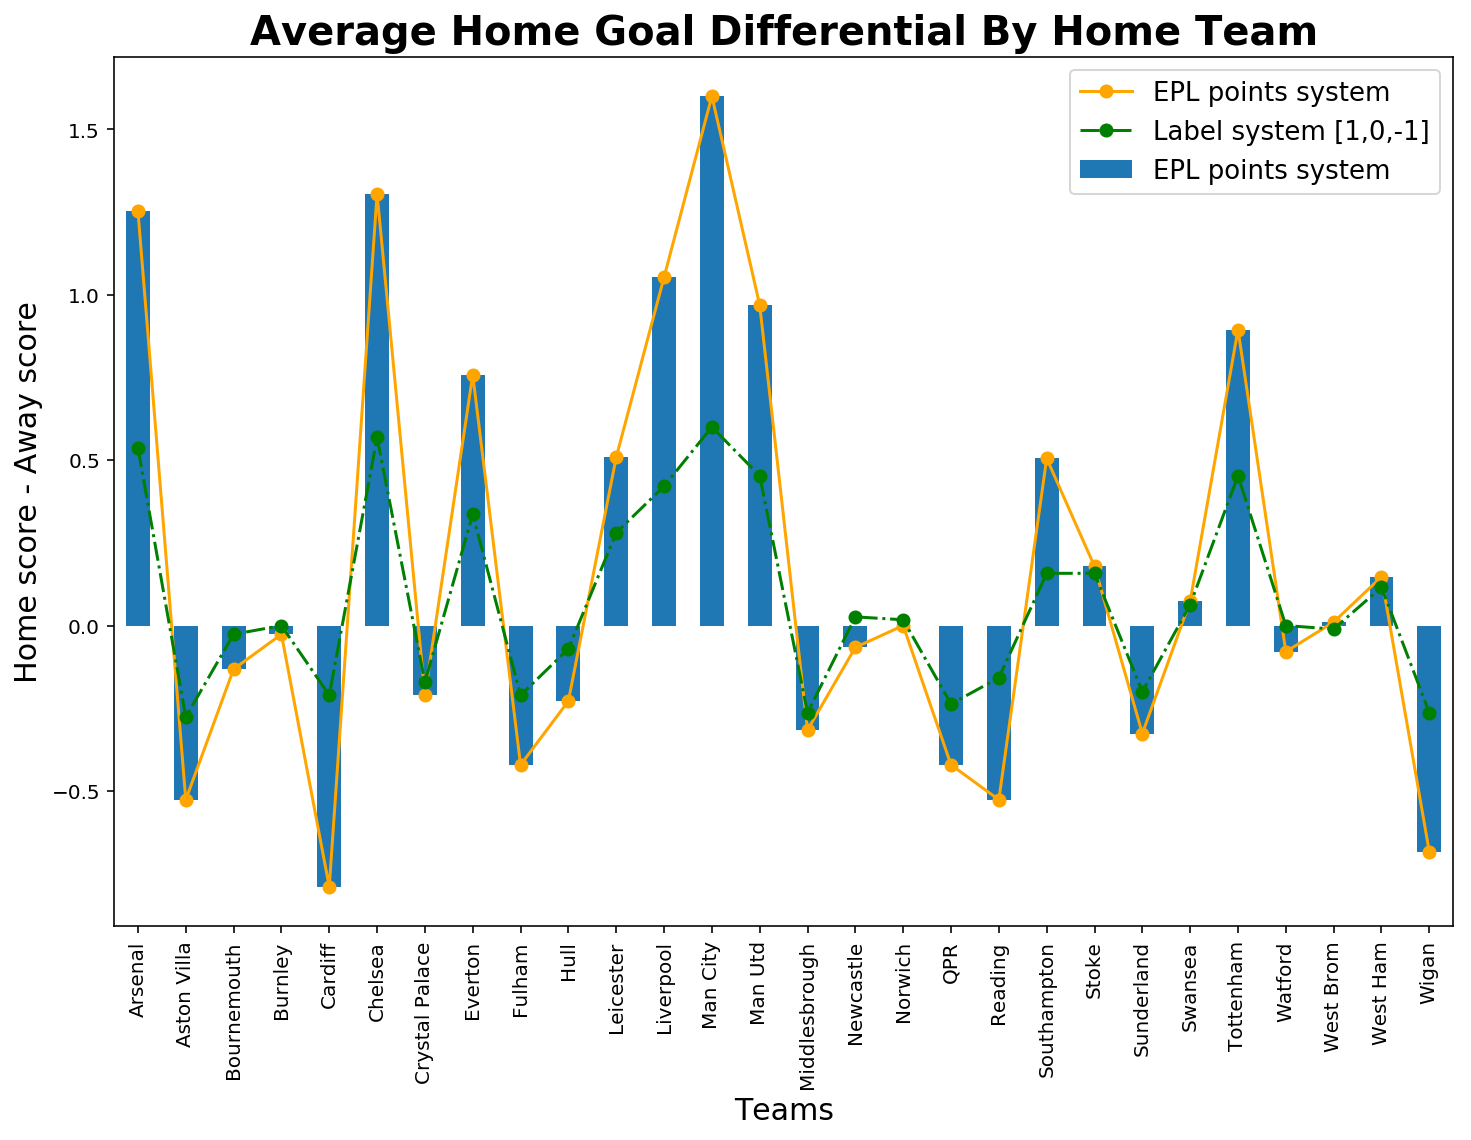

In [14]:
team_dom.dominancy_at_home(csvfile)

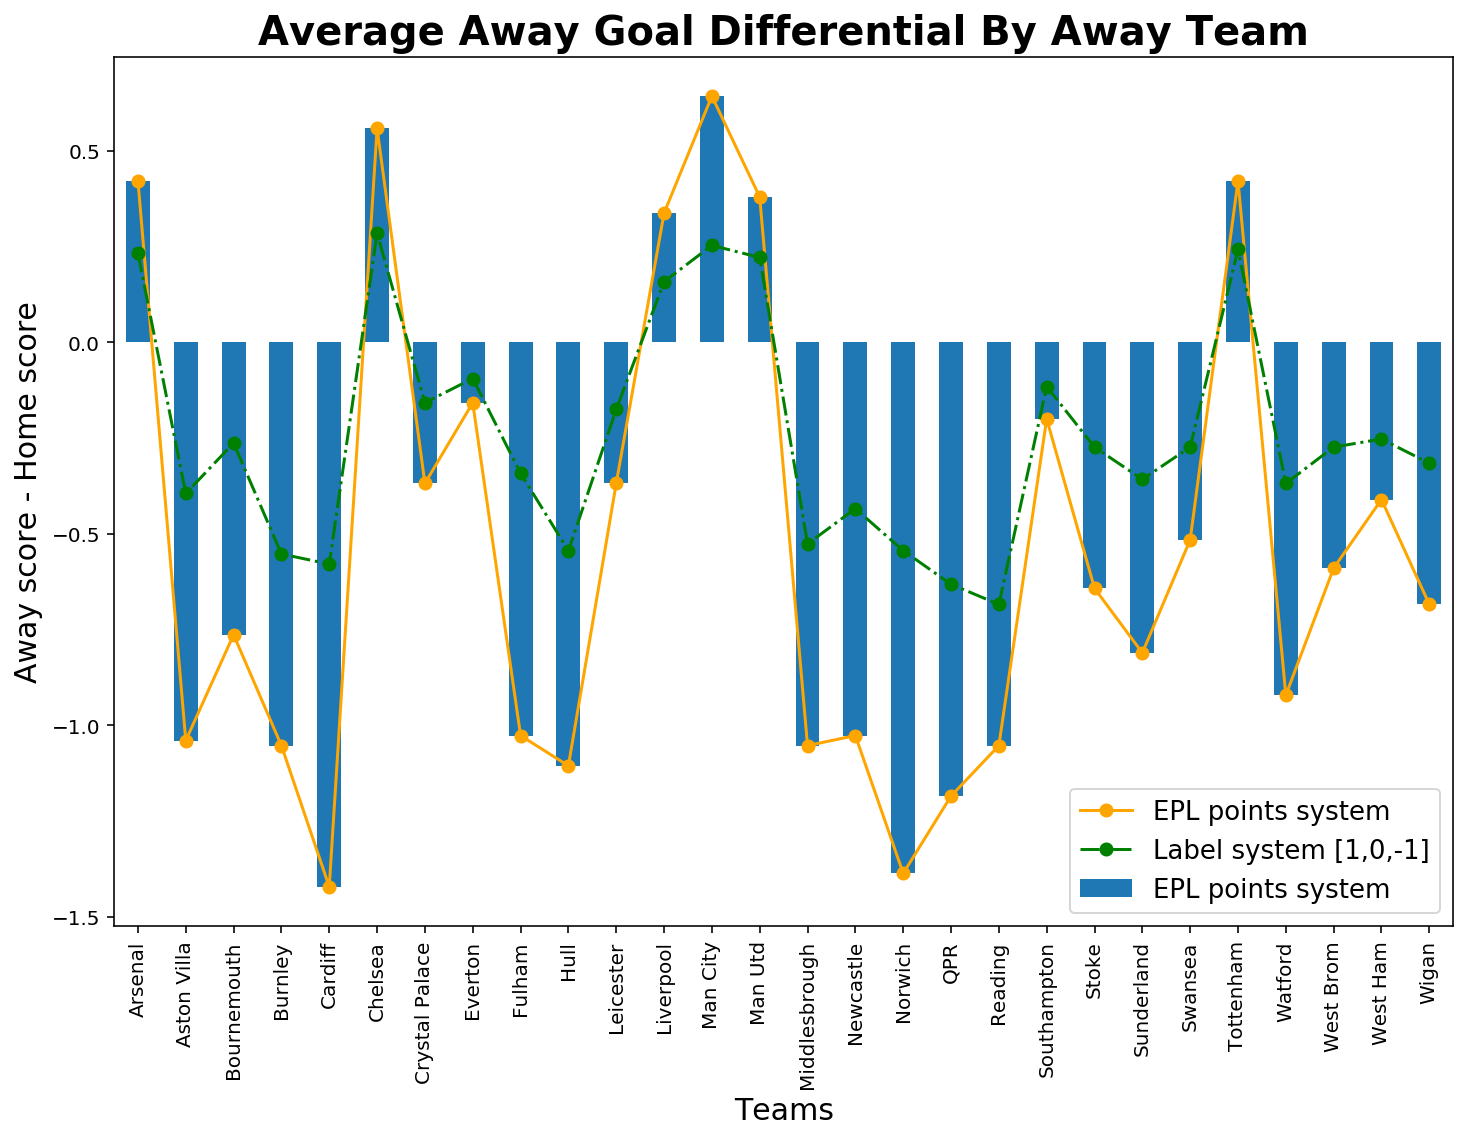

In [15]:
team_dom.dominancy_when_away(csvfile)

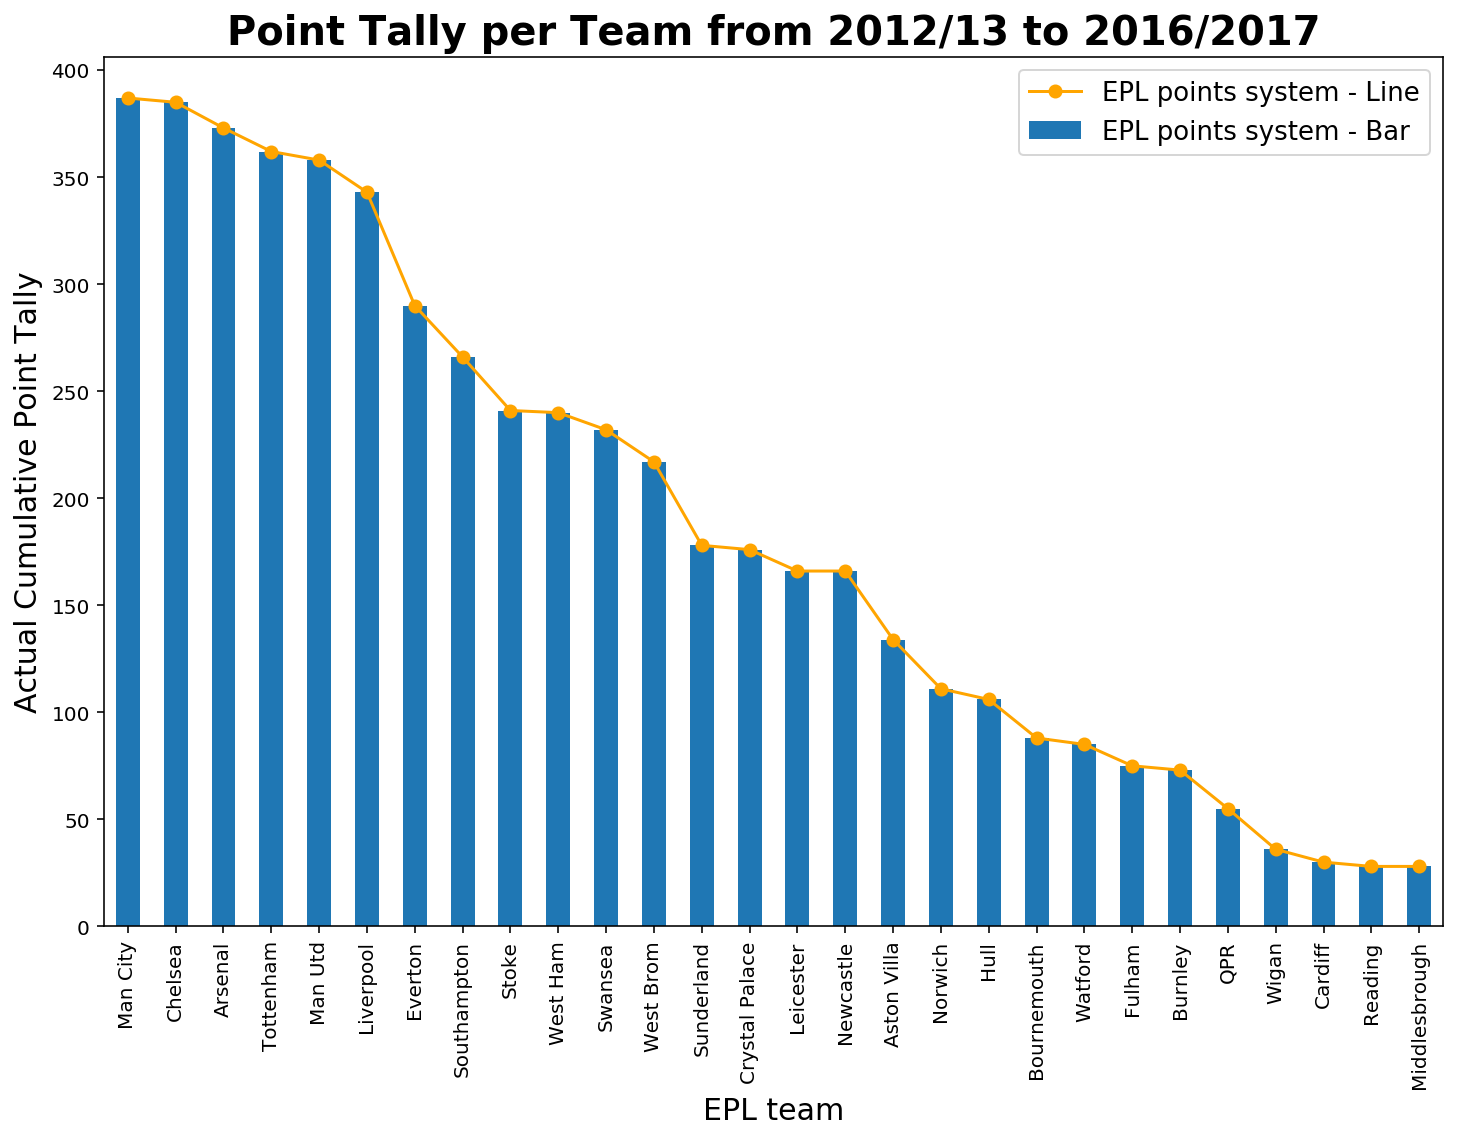

In [16]:
league_table.plot_league_table(csvfile)